In [287]:
import pickle
import numpy as np

In [288]:
with open("train_qa.txt", "rb") as fp:   # Unpickling
    train_data =  pickle.load(fp)

In [289]:
with open("test_qa.txt", "rb") as fp:   # Unpickling
    test_data =  pickle.load(fp)

In [290]:
type(test_data)

list

In [291]:
type(train_data)

list

In [292]:
len(test_data)

1000

In [293]:
len(train_data)

10000

In [294]:
test_data

[(['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'kitchen', '?'],
  'no'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Mary',
   'discarded',
   'the',
   'milk',
   '.',
   'John',
   'went',
   'to',
   'the',
   'garden',
   '.',
   'Daniel',
   'moved',
   'to',
   'the',
   'bedroom',
   '.',
   'Daniel',
   'went',
   'to',
   'the',
   'garden',
   '.'],
  ['Is', 'John', 'in', 'the', 'garden', '?'],
  'yes'),
 (['Mary',
   'got',
   'the',
   'milk',
   'there',
   '.',
   'John',
   'moved',


In [295]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [296]:
train_data[3]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.',
  'Mary',
  'went',
  'back',
  'to',
  'the',
  'bedroom',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'went',
  'to',
  'the',
  'kitchen',
  '.',
  'Daniel',
  'went',
  'back',
  'to',
  'the',
  'bathroom',
  '.',
  'Daniel',
  'picked',
  'up',
  'the',
  'football',
  'there',
  '.',
  'Daniel',
  'went',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Daniel', 'in', 'the', 'bedroom', '?'],
 'yes')

In [297]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [298]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [299]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [300]:
train_data[0][2]

'no'

In [301]:
vocab = set()

In [302]:
all_data = test_data + train_data

In [303]:
for story, question , answer in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(question))

In [304]:
vocab.add('no')
vocab.add('yes')

In [305]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [306]:
vocab_len = len(vocab) + 1

In [307]:
vocab_len

38

In [308]:
max_story_len = max([len(data[0]) for data in all_data])

In [309]:
max_story_len

156

In [310]:
max_question_len = max([len(data[1]) for data in all_data])

In [311]:
max_question_len

6

In [312]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [313]:
# Reserve 0 for pad_sequences
vocab_size = len(vocab) + 1

In [314]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [315]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [316]:
tokenizer.word_index

{'john': 1,
 'got': 2,
 '?': 3,
 'milk': 4,
 'bedroom': 5,
 'picked': 6,
 '.': 7,
 'the': 8,
 'travelled': 9,
 'left': 10,
 'moved': 11,
 'put': 12,
 'garden': 13,
 'down': 14,
 'dropped': 15,
 'mary': 16,
 'hallway': 17,
 'yes': 18,
 'up': 19,
 'is': 20,
 'took': 21,
 'football': 22,
 'office': 23,
 'discarded': 24,
 'no': 25,
 'there': 26,
 'kitchen': 27,
 'bathroom': 28,
 'daniel': 29,
 'journeyed': 30,
 'apple': 31,
 'back': 32,
 'sandra': 33,
 'to': 34,
 'in': 35,
 'grabbed': 36,
 'went': 37}

In [317]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [318]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [319]:
len(train_story_text)

10000

In [320]:
len(train_story_seq)

10000

In [321]:
s = [[51]]
pad_sequences(s,10)

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0, 51]], dtype=int32)

In [322]:
# word_index = tokenizer.word_index

In [323]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):

    # X = STORIES
    X = []
    # Xq = QUERY/QUESTION
    Xq = []
    # Y = CORRECT ANSWER
    Y = []


    for story, query, answer in data:

        x = [word_index[word.lower()] for word in story]
        # Grab the word index for every word in query
        xq = [word_index[word.lower()] for word in query]

        y = np.zeros(len(word_index) + 1)

        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)
    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [324]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [325]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [326]:
inputs_test

array([[ 0,  0,  0, ...,  8,  5,  7],
       [ 0,  0,  0, ...,  8, 13,  7],
       [ 0,  0,  0, ...,  8, 13,  7],
       ...,
       [ 0,  0,  0, ...,  8, 31,  7],
       [ 0,  0,  0, ...,  8, 13,  7],
       [ 0,  0,  0, ..., 31, 26,  7]], dtype=int32)

In [327]:
queries_test

array([[20,  1, 35,  8, 27,  3],
       [20,  1, 35,  8, 27,  3],
       [20,  1, 35,  8, 13,  3],
       ...,
       [20, 16, 35,  8,  5,  3],
       [20, 33, 35,  8, 13,  3],
       [20, 16, 35,  8, 13,  3]], dtype=int32)

In [328]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [329]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0., 497.,   0.,   0.,   0.,
         0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [330]:
tokenizer.word_index['yes']

18

In [331]:
tokenizer.word_index['no']

25

In [332]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [333]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [334]:
print(input_sequence,';',question,';',vocab_size)

KerasTensor(type_spec=TensorSpec(shape=(None, 156), dtype=tf.float32, name='input_7'), name='input_7', description="created by layer 'input_7'") ; KerasTensor(type_spec=TensorSpec(shape=(None, 6), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'") ; 38


In [335]:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))


In [336]:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))

In [337]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))

In [338]:
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [339]:
input_encoded_m

<KerasTensor: shape=(None, 156, 64) dtype=float32 (created by layer 'sequential_9')>

In [340]:
question_encoded

<KerasTensor: shape=(None, 6, 64) dtype=float32 (created by layer 'sequential_11')>

In [341]:
match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'dot_3')>

In [342]:
match = Activation('softmax')(match)
match

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'activation_6')>

In [343]:
response = add([match, input_encoded_c])
response

<KerasTensor: shape=(None, 156, 6) dtype=float32 (created by layer 'add_3')>

In [344]:
response = Permute((2, 1))(response)
response

<KerasTensor: shape=(None, 6, 156) dtype=float32 (created by layer 'permute_3')>

In [345]:
answer = concatenate([response, question_encoded])

In [346]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate_3')>

In [347]:
answer = LSTM(32)(answer)

In [348]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [349]:
answer = Activation('softmax')(answer)
model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [350]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_8 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_9 (Sequential)   (None, None, 64)             2432      ['input_7[0][0]']             
                                                                                                  
 sequential_11 (Sequential)  (None, 6, 64)                2432      ['input_8[0][0]']             
                                                                                            

In [351]:
# train
history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=10,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/10
313/313 [==============================] - 5s 10ms/step - loss: 0.9112 - accuracy: 0.4960 - val_loss: 0.6994 - val_accuracy: 0.4970
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 0.7094 - accuracy: 0.4994 - val_loss: 0.6942 - val_accuracy: 0.5030
Epoch 3/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6995 - accuracy: 0.4967 - val_loss: 0.6938 - val_accuracy: 0.4970
Epoch 4/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6968 - accuracy: 0.5040 - val_loss: 0.6964 - val_accuracy: 0.4970
Epoch 5/10
313/313 [==============================] - 3s 10ms/step - loss: 0.6956 - accuracy: 0.4985 - val_loss: 0.6936 - val_accuracy: 0.4970
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.6957 - accuracy: 0.4995 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 7/10
313/313 [==============================] - 3s 8ms/step - loss: 0.6953 - accuracy: 0.4993 - val_loss: 0.6933 - val_accuracy: 0.5030
Epo

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


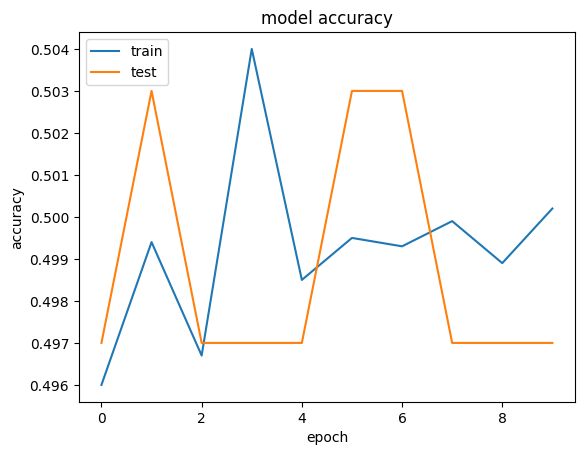

In [352]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [353]:
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Evaluating

In [354]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 0s 2ms/step


In [355]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [371]:
story =' '.join(word for word in test_data[1][0])
print(story)

Mary got the milk there . John moved to the bedroom . Mary discarded the milk . John went to the garden .


In [372]:
query = ' '.join(word for word in test_data[1][1])
print(query)

Is John in the kitchen ?


In [373]:
print("True Test Answer from Data is:",test_data[1][2])

True Test Answer from Data is: no


In [374]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.52241457


In [375]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [376]:
# Note the whitespace ,
my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [378]:
my_question = "Is John in the kitchen ?"

In [379]:
my_question.split()

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [380]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [381]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [382]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 16ms/step


In [383]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.5223964
